In [48]:
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

import pandas as pd
import numpy as np
import cv2
import scipy as sp

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, SpectralClustering, DBSCAN

import os
from collections import Counter
import warnings

### work-in-progress subnote

In [49]:
def load_images(path: str, mode: str='RGB') -> np.ndarray:
    
    conversion_attr = f"COLOR_BGR2{mode}"
    conversion_code = getattr(cv2, conversion_attr)
    
    images = []
    for file in os.listdir(path):
        if file.lower().endswith('.jpg'):
            img_path = os.path.join(path, file)
            img_bgr = cv2.imread(img_path)
            if img_bgr is None:
                continue
            img = cv2.cvtColor(img_bgr, conversion_code)
            images.append(img)
            
    return np.array(images)

In [50]:
data = load_images(path='data/$learning_2', mode='RGB')

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

def spectral_segmentation(img_rgb, n_clusters=4, gamma=0.04):
    
    im = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

    height, width, _ = im.shape
    X, Y = np.meshgrid(np.arange(width), np.arange(height)) 
    coords = np.stack((X, Y), axis=2)

    features = np.concatenate((im, coords), axis=2).reshape(-1, 5)
    features = features.astype(float)

    sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=gamma, assign_labels='kmeans', random_state=42)

    labels = sc.fit_predict(features)

    segmented = np.zeros_like(img_rgb)
    for k in range(n_clusters):
        mask = (labels == k)
        cluster_color = np.mean(img_rgb.reshape(-1, 3)[mask], axis=0)
        segmented.reshape(-1, 3)[mask] = cluster_color

    segmented = segmented.astype(np.uint8)
    return segmented


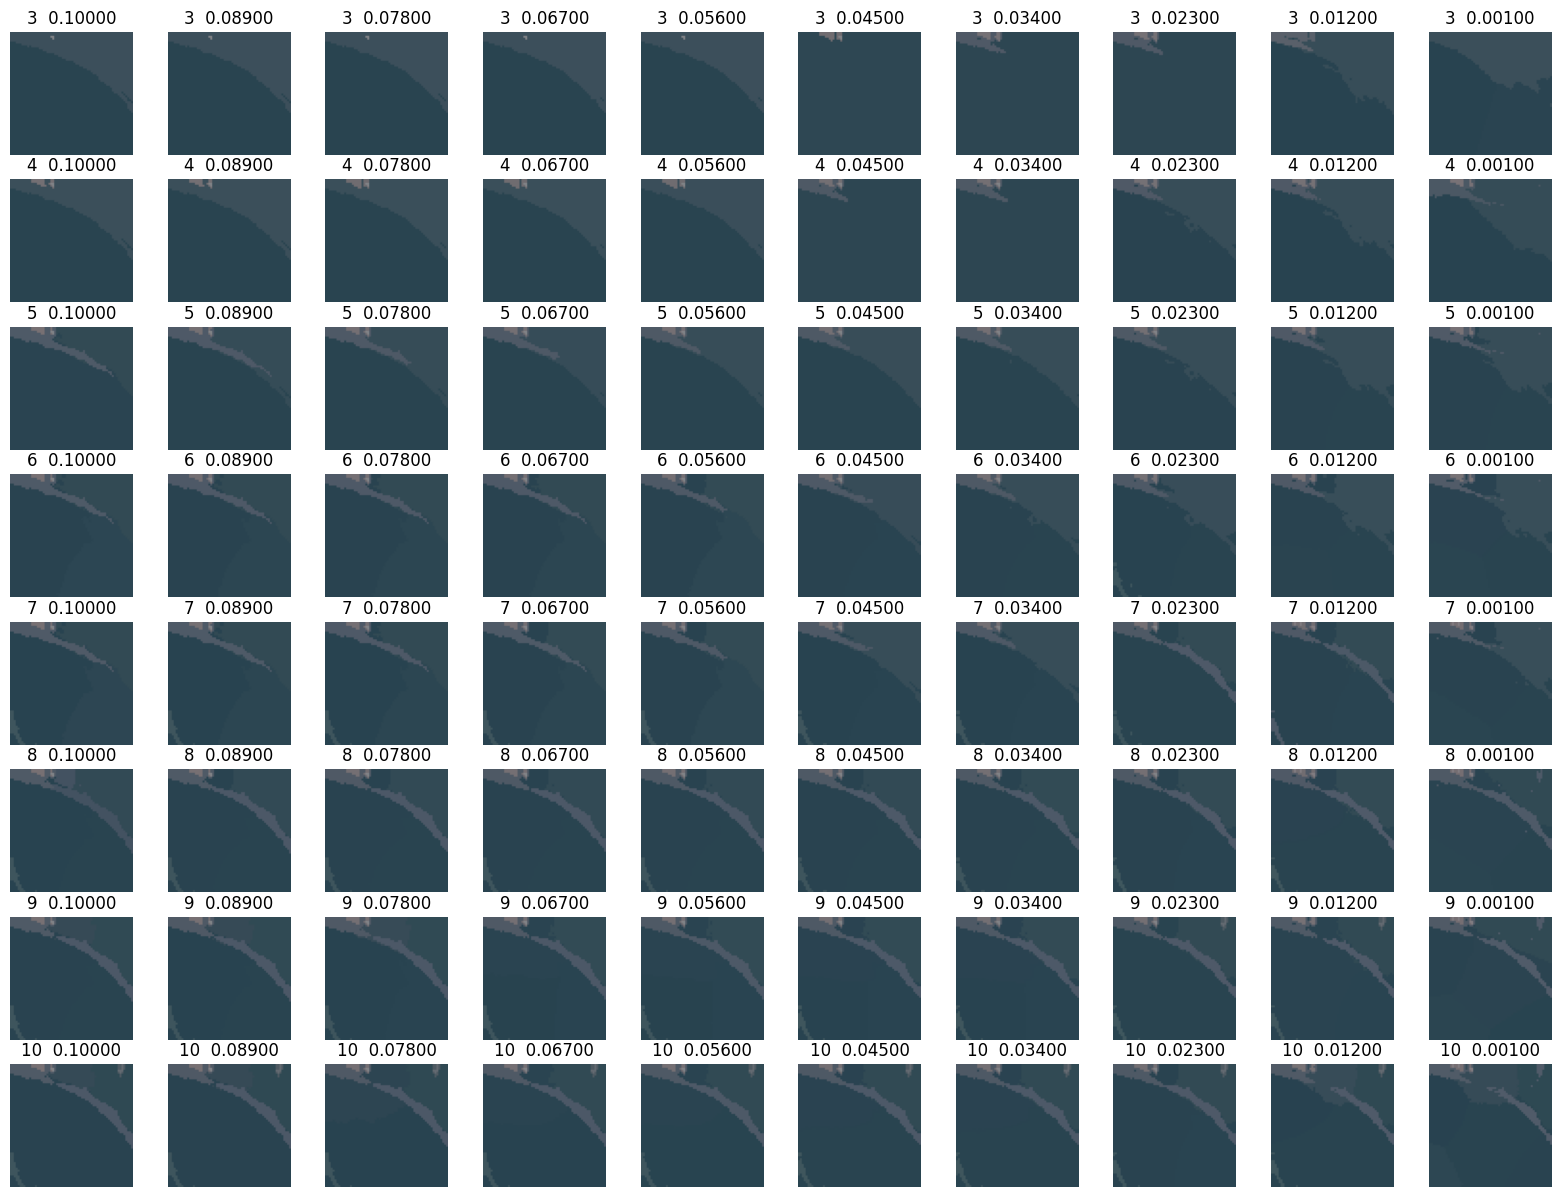

In [108]:
img_rgb = data[5]


fig, ax = plt.subplots(8, 10, figsize=(20, 15), dpi=100)

for k in range(3, 11):
    for i, gamma in enumerate(np.linspace(0.1, 0.001, 10)):
        segmented, _ = spectral_segmentation(img_rgb, n_clusters=k, gamma=gamma)
        ax[k-3, i].imshow(segmented)
        ax[k-3, i].set_title(f"{k}  {gamma:.5f}")
        ax[k-3, i].axis('off')

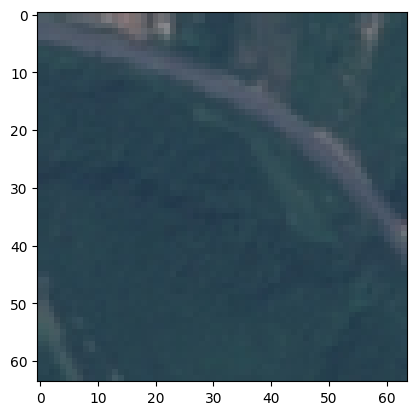

In [77]:
plt.imshow(data[5])

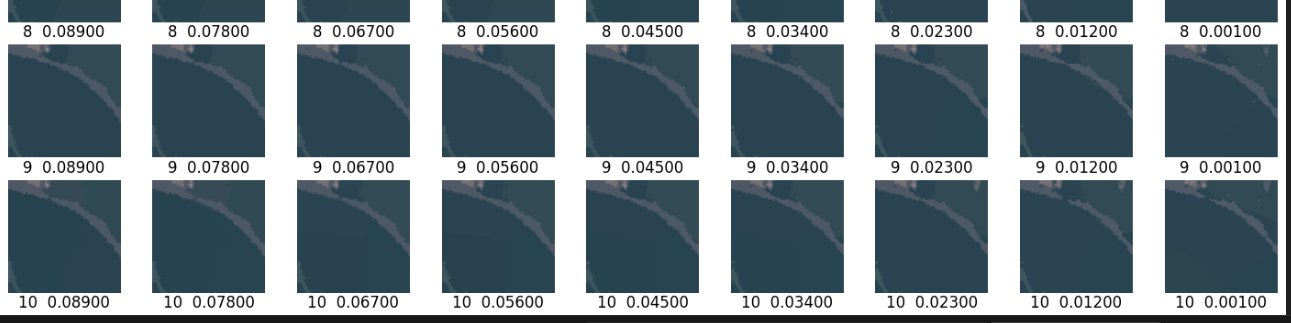